<a href="https://colab.research.google.com/github/bradshimmin/llm_experiments/blob/main/new_stack_ai_skills_tracker_10jul24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GenAI Technology Stack Tracker

---
## Install and import libraries

In [1]:
# Install and import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import os
import json
import re
from pprint import pprint


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Get secret keys
from google.colab import userdata


Mounted at /content/gdrive


In [3]:
# Install OpenAI and Anthropic libraries
!pip install -qU openai
from openai import OpenAI

# set up Anthropic
!pip install -qU anthropic
from anthropic import Anthropic


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.5/328.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.4/865.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 17.9 MB/s eta 0:00:00


In [4]:
# Set up OpenAI
openai_model="gpt-3.5-turbo-instruct"
openai_client = OpenAI(api_key=userdata.get('OpenAI_key'))

# set up Anthropic
anthropic_model = "claude-3-haiku-20240307"
anthropic_client = Anthropic(api_key=userdata.get('Anthropic_key'))

---
## Get some data


In [5]:
# Load DF
df = pd.read_pickle('/content/gdrive/MyDrive/Colab Notebooks/Datasets/ai_skills_tracker/ai_skills_2q24/AI Skills Full 2Q24.pkl')
print("all done")


all done


In [6]:
df.shape

(205517, 30)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205517 entries, 0 to 466806
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   RecordID                  205517 non-null  int64  
 1   Job title                 205517 non-null  object 
 2   Full job description      205517 non-null  object 
 3   Date collected            160769 non-null  object 
 4   Date posted               205517 non-null  object 
 5   Week                      205517 non-null  int64  
 6   Year                      205517 non-null  int64  
 7   Month                     205517 non-null  int64  
 8   Quarter                   205517 non-null  object 
 9   Hiring entity             205517 non-null  object 
 10  Entity size               194224 non-null  object 
 11  Home office hybrid work   205517 non-null  object 
 12  Full or part time status  202508 non-null  object 
 13  Number of applicants      83853 non-null   float6

In [8]:
df.describe()

,RecordID,Week,Year,Month,Number of applicants,Longitude,Latitude,Salary start,Salary end
count,205517.000000,205517.000000,205517.000000,205517.000000,83853.000000,205517.000000,205517.000000,109670.000000,108908.000000
mean,153375.824073,25.749378,2022.844392,6.355158,32.844967,-55.994817,36.510116,88063.251518,131141.707937
std,133859.621951,14.756254,0.722429,3.409576,42.365210,69.150189,14.424002,22601.000215,33389.021447
min,1.000000,1.000000,2022.000000,1.000000,0.000000,-158.081787,-54.808030,0.000000,0.000000
25%,52246.000000,14.000000,2022.000000,4.000000,4.000000,-99.414619,34.053570,81000.000000,112863.500000
50%,104686.000000,24.000000,2023.000000,6.000000,15.000000,-79.644378,39.398703,88602.000000,127559.000000
75%,274411.000000,38.000000,2023.000000,9.000000,45.000000,-1.550268,42.358662,95000.000000,147590.000000
max,466806.000000,52.000000,2024.000000,12.000000,200.000000,179.259100,70.027908,500000.000000,993404.000000


In [9]:
# Convert "Date posted" to datetime format
df['Date posted'] = pd.to_datetime(df['Date posted'])

# Create a new dataframe with only entries in 2024
df_2024 = df[df['Date posted'].dt.year == 2024]

df_2024.shape


(40128, 30)

In [10]:
# pull out entries that specify GenAI tech
keywords = ['GenAI', 'transformer', 'openai', 'gpt', 'generative AI']

df_genai = df_2024[df_2024['Full job description'].str.contains('|'.join(keywords))]

df_genai.shape


(2880, 30)

In [11]:
# Create a test sample from this sete
openai_small_sample_df = df_genai[['RecordID', 'Full job description']].sample(n=2)
anthropic_small_sample_df = openai_small_sample_df.copy()

In [12]:
# Check sample
openai_small_sample_df

,RecordID,Full job description
274043,274046,Please return soon to complete your dream job ...
454763,454763,"FEQ225R94\n\nThis role can be remote, targetin..."


## Set up prompts
---

In [13]:
# Extraction prompt
ext_prompt = f"""Extract all AI product and project names from the following job
description.

Examples of what to look for include Kubernetes, Docker,
MongoDB, PostgreSQL, BigQuery, Llama, GPT, Phi, Spark, Dataflow, JAX,
Bedrock, Vertex AI,  etc.

Only return these examples if they appear in the description below.
Also, please be thorough and return as many products and/or technologies
as possible. Lastly, return a comma-delimited list, nothing more:

Description: \n"""


In [14]:
# Categorization prompt
cat_prompt = f"""
Categorize each of the following technologies into one of the
following categories. Only return one Category; do not leave any blank.

Categories:
1. Infrastructure Layer
2. Data Layer
3. Model Training Layer
4. Model Serving Layer
5. Pipeline and Automation Layer
6. Monitoring and Management Layer
7. User Interface Layer
8. Security and Compliance Layer
9. Collaboration and Communications Layer

Output format:
Technology: Category

Technologies:
\n"""

---
## Test with OpenAI

In [15]:
# define function to extract technologies from job desc
def extract_technologies(description):
    """Generate list of technologies extracted from text"""
    prompt = ext_prompt + description
    response = openai_client.completions.create(
        model=openai_model,
        prompt=prompt,
    )
    return response.choices[0].text.strip()

In [16]:
# Run sample through OpenAI for extraction
openai_small_sample_df['Extracted Technologies'] = openai_small_sample_df['Full job description'].apply(extract_technologies)


In [17]:
openai_small_sample_df

,RecordID,Full job description,Extracted Technologies
274043,274046,Please return soon to complete your dream job ...,"Kubernetes, OpenText, information management, ..."
454763,454763,"FEQ225R94\n\nThis role can be remote, targetin...","Databricks, GenAI, MLOps, ML, RAG"


In [18]:
# Now let's categorize these
def categorize_technologies(technologies):
    """categorize each of the technologies into one of the
    following categories"""
    prompt = cat_prompt + technologies
    response = openai_client.completions.create(
        model=openai_model,
        prompt=prompt,
    )
    return response.choices[0].text.strip()

In [19]:
# Now we parse categorized output
def parse_categorized_output(categorized_output):
    """parse categorized output"""
    tech_list = categorized_output.split('\n')
    parsed_tech = []

    for tech in tech_list:
        if ': ' in tech:
            technology, category = tech.split(': ')
            parsed_tech.append({'Technology': technology, 'Layer': category})

    return parsed_tech


In [20]:
# Now we categorize our technologies
openai_small_sample_df['Categorized Technologies'] = openai_small_sample_df['Extracted Technologies'].apply(categorize_technologies)


In [21]:
# Finally, we parse all of this and put it in a new df
categorized_tech_list = []

for _, row in openai_small_sample_df.iterrows():
    categorized_output = row['Categorized Technologies']
    parsed_output = parse_categorized_output(categorized_output)
    for entry in parsed_output:
        entry['RecordID'] = row['RecordID']
        categorized_tech_list.append(entry)

categorized_tech_df = pd.DataFrame(categorized_tech_list)

# Integrate the categorized technologies back with the original DataFrame
final_df = df.merge(categorized_tech_df, on='RecordID', how='left')


In [22]:
final_df.columns

Index(['RecordID', 'Job title', 'Full job description', 'Date collected',
       'Date posted', 'Week', 'Year', 'Month', 'Quarter', 'Hiring entity',
       'Entity size', 'Home office hybrid work', 'Full or part time status',
       'Number of applicants', 'Longitude', 'Latitude', 'City', 'Territory',
       'Region', 'Experience level', 'Education level', 'Salary start',
       'Salary end', 'Main industry', 'Job title category', 'AI technologies',
       'AI skills', 'Source name', 'Source URL', 'File Date', 'Technology',
       'Layer'],
      dtype='object')

In [23]:
final_df.shape

(205517, 32)

In [24]:
# prompt: find and remove rows where Technology and Layer are both NaN values
final_df_deduped = final_df.dropna(subset=['Technology', 'Layer'])


In [25]:
final_df_deduped.shape

(2, 32)

In [26]:
final_df['Layer'].value_counts()

Layer
Infrastructure Layer    2
Name: count, dtype: int64

In [27]:
final_df['Technology'].value_counts()

Technology
Kubernetes    1
Databricks    1
Name: count, dtype: int64

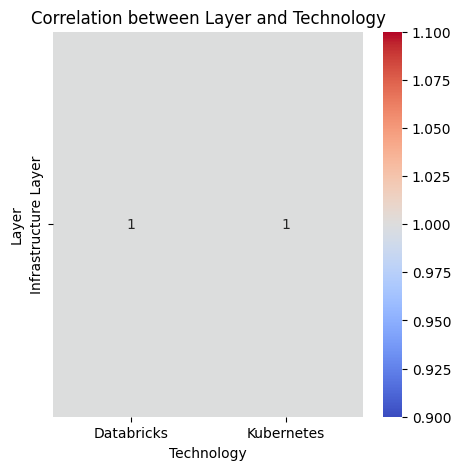

In [28]:
# prompt: Create a chart that shows the correlation between Layer and Technology
correlation_matrix = final_df_deduped.groupby(['Layer', 'Technology']).size().unstack()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xlabel('Technology')
plt.ylabel('Layer')
plt.title('Correlation between Layer and Technology')
plt.show()


# Same experiment this time with Anthropic Claude

In [29]:
# Function to extract product and technology names
def extract_technologies(description):
    """generate list of technologies extracted
    from text"""
    message = anthropic_client.messages.create(
        model=anthropic_model,
        max_tokens=1024,
        messages=[
            {
                "role": "user",
                "content": ext_prompt + description
            },
        ]
    ).content[0].text
    return message


In [30]:
anthropic_small_sample_df['Extracted Technologies'] = anthropic_small_sample_df['Full job description'].apply(extract_technologies)


In [31]:
anthropic_small_sample_df

,RecordID,Full job description,Extracted Technologies
274043,274046,Please return soon to complete your dream job ...,"Kubernetes, Docker, MongoDB, PostgreSQL, BigQu..."
454763,454763,"FEQ225R94\n\nThis role can be remote, targetin...","Apache Spark, Delta Lake, MLflow, Databricks, ..."


In [32]:
# Now let's categorize these
def categorize_technologies(technologies):
    """categorize each of the technologies into one of the
    following categories"""
    message = anthropic_client.messages.create(
        model=anthropic_model,
        max_tokens=1024,
        messages=[
            {
                "role": "user",
                "content": cat_prompt + technologies
            },
        ]
    ).content[0].text
    return message


In [33]:
# Now we parse categorized output
def parse_categorized_output(categorized_output):
    """Parse categorized output"""
    tech_list = categorized_output.split('\n')
    parsed_tech = []

    for tech in tech_list:
        if ': ' in tech:
            technology, category = tech.split(': ')
            parsed_tech.append({'Technology': technology, 'Layer': category})

    return parsed_tech


In [34]:
# Now we categorize our technologies
anthropic_small_sample_df['Categorized Technologies'] = anthropic_small_sample_df['Extracted Technologies'].apply(categorize_technologies)


In [35]:
# Finally, we parse all of this and put it in a new df
categorized_tech_list = []

for _, row in anthropic_small_sample_df.iterrows():
    categorized_output = row['Categorized Technologies']
    parsed_output = parse_categorized_output(categorized_output)
    for entry in parsed_output:
        entry['RecordID'] = row['RecordID']
        categorized_tech_list.append(entry)

categorized_tech_df = pd.DataFrame(categorized_tech_list)

# Integrate the categorized technologies back with the original DataFrame
final_df = df.merge(categorized_tech_df, on='RecordID', how='left')


In [36]:
final_df.columns

Index(['RecordID', 'Job title', 'Full job description', 'Date collected',
       'Date posted', 'Week', 'Year', 'Month', 'Quarter', 'Hiring entity',
       'Entity size', 'Home office hybrid work', 'Full or part time status',
       'Number of applicants', 'Longitude', 'Latitude', 'City', 'Territory',
       'Region', 'Experience level', 'Education level', 'Salary start',
       'Salary end', 'Main industry', 'Job title category', 'AI technologies',
       'AI skills', 'Source name', 'Source URL', 'File Date', 'Technology',
       'Layer'],
      dtype='object')

In [37]:
final_df.shape

(205531, 32)

In [38]:
# prompt: find and remove rows where Technology and Layer are both NaN values
final_df_deduped = final_df.dropna(subset=['Technology', 'Layer'])


In [39]:
final_df_deduped.shape

(16, 32)

In [40]:
final_df['Layer'].value_counts()

Layer
Data Layer                       5
Infrastructure Layer             3
Model Training Layer             3
Model Serving Layer              3
Pipeline and Automation Layer    2
Name: count, dtype: int64

In [41]:
final_df['Technology'].value_counts()

Technology
Kubernetes      1
Docker          1
MongoDB         1
PostgreSQL      1
BigQuery        1
Spark           1
Dataflow        1
JAX             1
Vertex AI       1
Apache Spark    1
Delta Lake      1
MLflow          1
Databricks      1
HuggingFace     1
Langchain       1
OpenAI          1
Name: count, dtype: int64

In [53]:
# Create a crosstab for Layer and Technology
crosstab = pd.crosstab(final_df['Layer'], final_df['Technology'])
crosstab

Technology,Apache Spark,BigQuery,Databricks,Dataflow,Delta Lake,Docker,HuggingFace,JAX,Kubernetes,Langchain,MLflow,MongoDB,OpenAI,PostgreSQL,Spark,Vertex AI
Layer,,,,,,,,,,,,,,,,
Data Layer,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
Infrastructure Layer,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
Model Serving Layer,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
Model Training Layer,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
Pipeline and Automation Layer,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


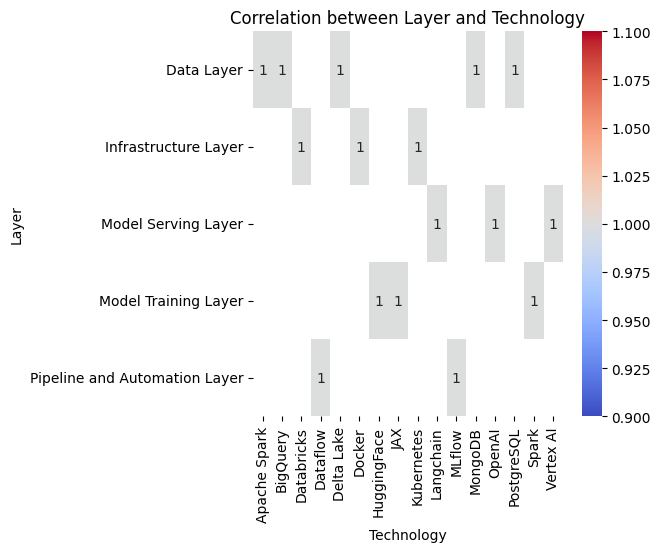

In [42]:
# prompt: Create a chart that shows the correlation between Layer and Technology
correlation_matrix = final_df_deduped.groupby(['Layer', 'Technology']).size().unstack()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xlabel('Technology')
plt.ylabel('Layer')
plt.title('Correlation between Layer and Technology')
plt.show()
